<a href="https://colab.research.google.com/github/Demonious/CEV-DataScience-Tasks/blob/main/TASK_6A_6B_6C_6D_6E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

y : CDRGLOB
X : all columns except for the label
Train-test split: .80-.20 (please use the stratify parameter)
Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [4]:
data=pd.read_excel('Temporary_data3_Left_Right_Copy.xlsx')
data

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,20,1,1,1,1,1,0,0,0,...,24.6892,2.6528,10.5460,2.1712,14.1128,2.8833,9.3176,2.3582,0.6735,1.0270
1350,1,16,1,2,1,0,1,0,0,0,...,24.7908,2.0993,10.4094,1.4855,10.7880,1.9027,10.2034,2.0484,0.7267,0.7946
1351,2,14,2,1,1,1,1,0,0,0,...,23.8500,2.1200,12.3900,1.5300,12.6600,1.9900,9.4800,1.7400,1.1800,1.5900
1352,2,20,3,1,1,1,1,25,0,0,...,31.3500,2.4300,10.8200,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200


In [2]:
Y = data['CDRGLOB']
X = data.drop(['CDRGLOB'], axis=1)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size=0.2)

model.fit(X_train, y_train)
y_test_model = model.predict(X_test)
accuracy_score(y_test, y_test_model)

0.5608856088560885

In [13]:
from sklearn.model_selection import cross_val_score
for i in (5,10):
  score = cross_val_score(model, X_train, y_train, cv=i)
  print(score.mean()) #ilk satırda 5 için, ikinci satırda ise 10 değeri ele alınmıştır.

0.5143027820447175
0.5096670064559973



TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its 3 parameters at least with 5 different values for each) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values on the test dataset. 

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
model3=KNeighborsClassifier()

param_grid = {"n_neighbors" : [5,6,7,8,9],
              "weights": ["uniform", "distance"],
              "algorithm": ["auto", "ball_tree","kd_tree", "brute"]}


for i in (5,10):
  grid = GridSearchCV(model3, param_grid, cv=i)

In [23]:
grid.fit(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [46]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}

In [47]:
acc = grid_search.best_score_ 
print(acc)

0.52353041114509


TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels (separately for true labels and predicted labels in 2 different graphs). For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

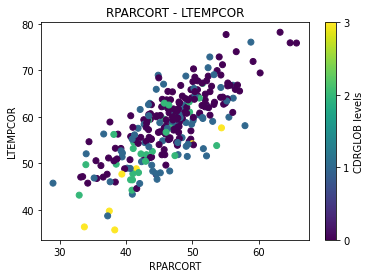

In [50]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.scatter(X_test["RPARCORT"], X_test["LTEMPCOR"],c=y_test)
plt.title("RPARCORT - LTEMPCOR")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions. 

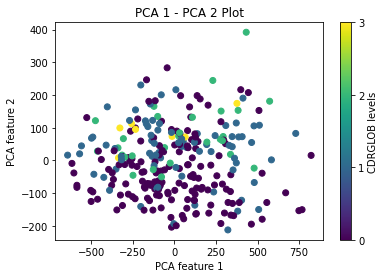

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_x = pca.fit_transform(X_test)
plt.scatter(pca_x[:,0], pca_x[:,1], c=y_test)
plt.title("PCA 1 - PCA 2 Plot")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("PCA feature 2")
plt.xlabel("PCA feature 1")
plt.show()

TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education. 

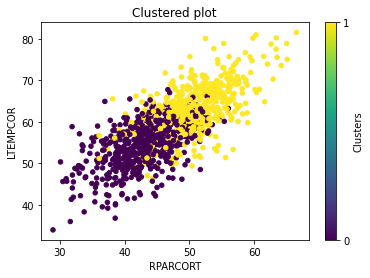

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
plt.scatter(X_train["RPARCORT"], X_train["LTEMPCOR"],c=kmeans.fit_predict(X_train), s=20)
plt.title("Clustered plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();